In [1]:
!pip install -q yfinance

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
pandas-profiling 3.1.0 requires markupsafe~=2.0.1, but you have markupsafe 2.1.2 which is incompatible.
ibis-framework 2.1.1 requires importlib-metadata<5,>=4; python_version < "3.8", but you have importlib-metadata 6.0.0 which is incompatible.
apache-beam 2.40.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.
apache-beam 2.40.0 requires pyarrow<8.0.0,>=0.15.1, but you have pyarrow 8.0.0 which is incompatible.


In [64]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-01-30,101.089996,101.739998,99.010002,100.550003,100.550003,70691900,AMAZON
2023-01-31,101.160004,103.349998,101.139999,103.129997,103.129997,66527300,AMAZON
2023-02-01,102.529999,106.239998,101.239998,105.150002,105.150002,80450100,AMAZON
2023-02-02,110.250000,114.000000,108.879997,112.910004,112.910004,158154200,AMAZON
2023-02-03,105.260002,108.779999,102.519997,103.389999,103.389999,144173400,AMAZON
2023-02-06,102.930000,103.949997,100.650002,102.180000,102.180000,81945200,AMAZON
2023-02-07,101.169998,102.410004,98.080002,102.110001,102.110001,119501300,AMAZON
2023-02-08,102.040001,102.669998,98.779999,100.050003,100.050003,75878300,AMAZON
2023-02-09,101.320000,101.779999,97.570000,98.239998,98.239998,64622500,AMAZON


In [3]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,151.172680,153.314040,149.166840,151.334440,150.759377,8.530116e+07
std,12.565075,12.464843,12.569125,12.566468,12.372435,2.324056e+07
min,126.010002,127.769997,124.169998,125.019997,124.829399,3.519590e+07
25%,142.099998,143.722496,139.924995,142.457497,141.965424,6.961018e+07
50%,149.455002,151.474998,147.770004,150.304993,149.881142,8.038435e+07
75%,161.092495,163.620003,159.204994,161.477497,160.805214,9.381580e+07
max,178.550003,179.610001,176.699997,178.960007,177.882446,1.826020e+08


We have only 255 records in one year because weekends are not included in the data.

In [4]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-02-14 to 2023-02-10
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          250 non-null    float64
 1   High          250 non-null    float64
 2   Low           250 non-null    float64
 3   Close         250 non-null    float64
 4   Adj Close     250 non-null    float64
 5   Volume        250 non-null    int64  
 6   company_name  250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [67]:
tech_list_NEW = ['NHAI', 'HUDCO', 'IIFL', 'RECLTD']

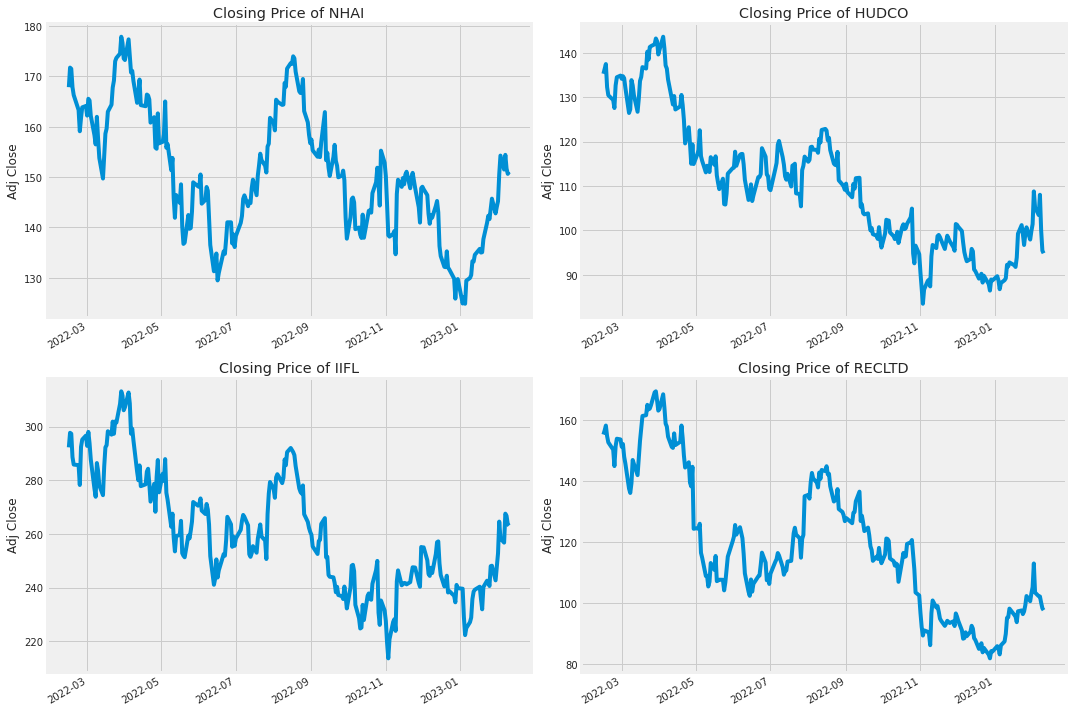

In [68]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list_NEW[i - 1]}")
    
plt.tight_layout()

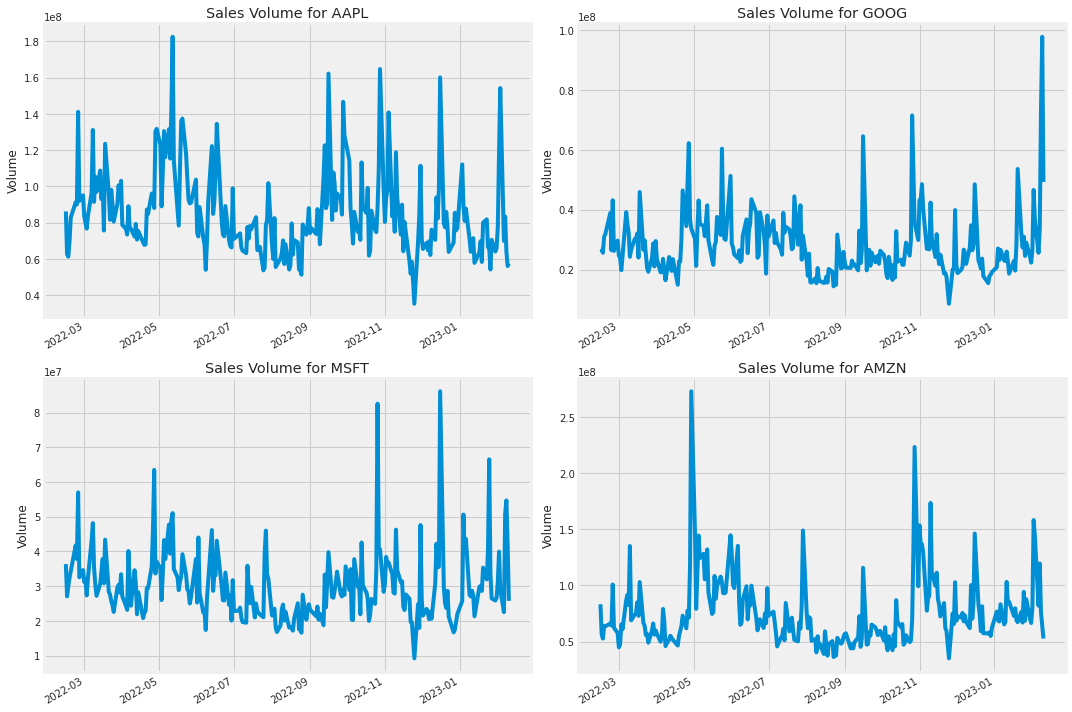

In [6]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

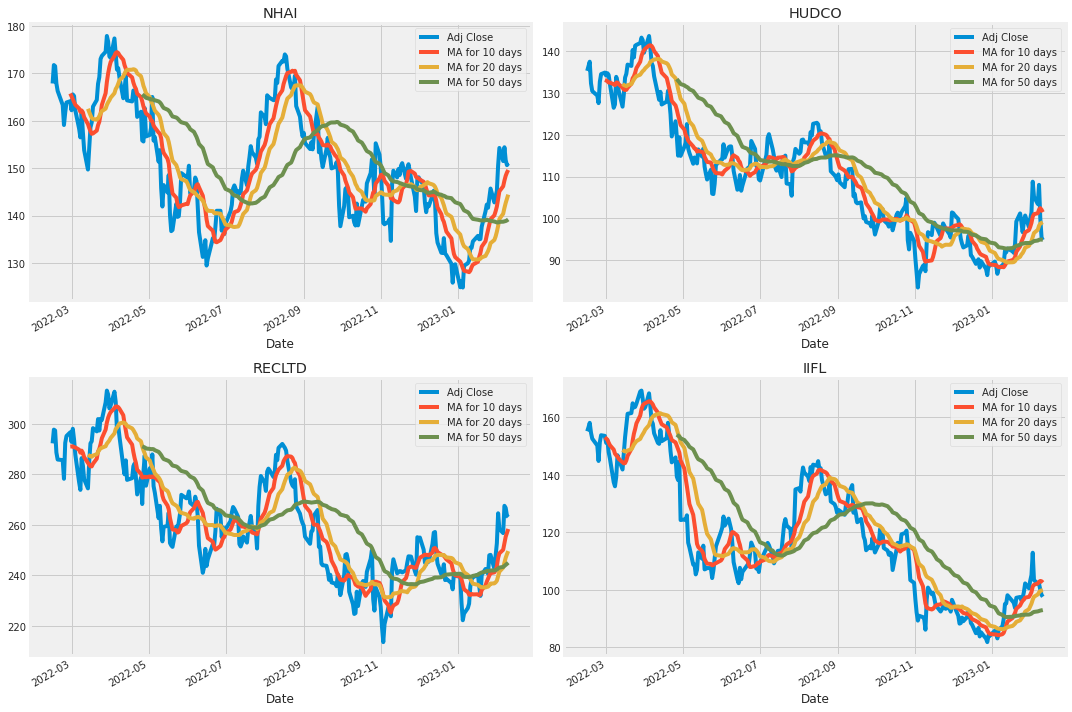

In [69]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()
        

fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('NHAI')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('HUDCO')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('RECLTD')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('IIFL')

fig.tight_layout()

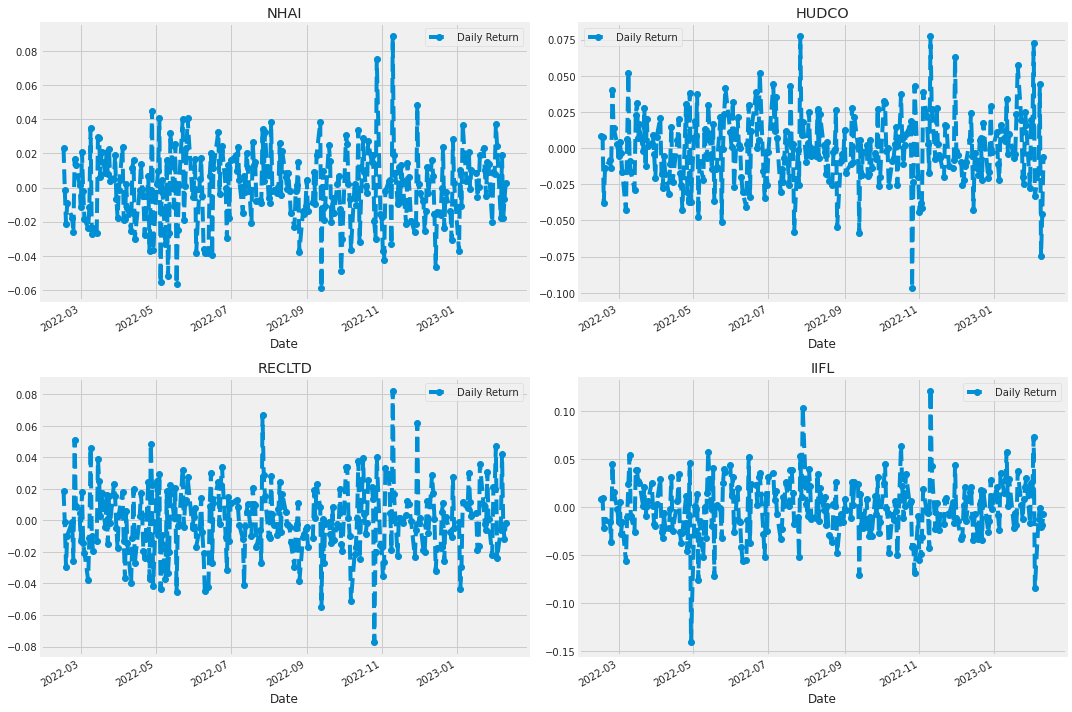

In [70]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('NHAI')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('HUDCO')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('RECLTD')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('IIFL')

fig.tight_layout()

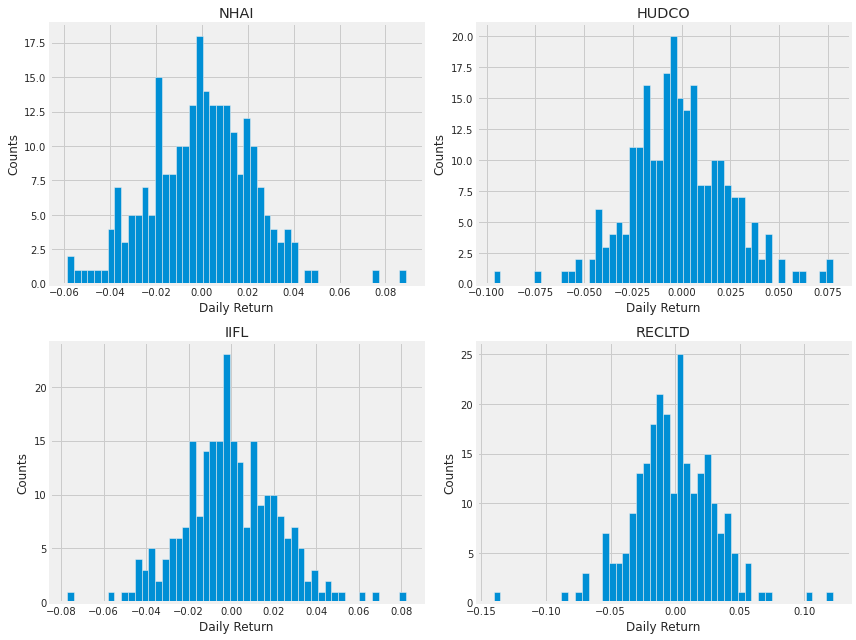

In [71]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{tech_list_NEW[i - 1]}')
    
plt.tight_layout()

In [10]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


,AAPL,AMZN,GOOG,MSFT
Date,,,,
2022-02-14,NaN,NaN,NaN,NaN
2022-02-15,0.023152,0.008658,0.008319,0.018542
2022-02-16,-0.001389,0.010159,0.007784,-0.001167
2022-02-17,-0.021269,-0.021809,-0.037669,-0.029282
2022-02-18,-0.009356,-0.013262,-0.013914,-0.009631


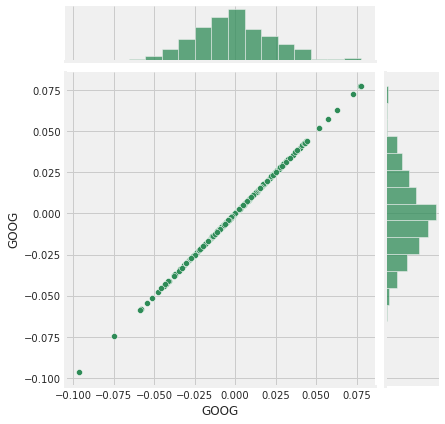

In [11]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

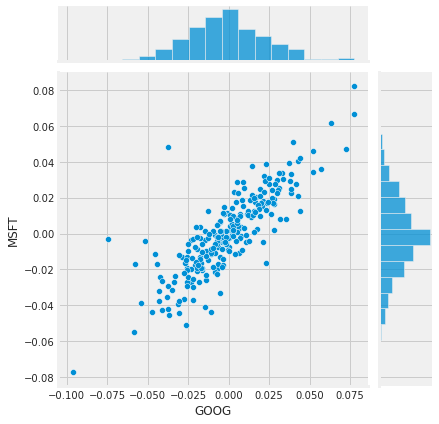

In [12]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

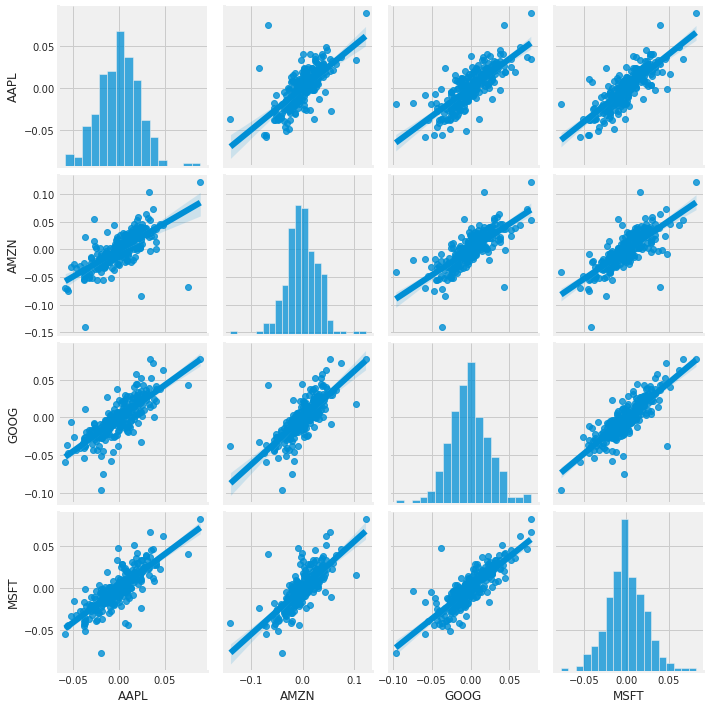

In [13]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

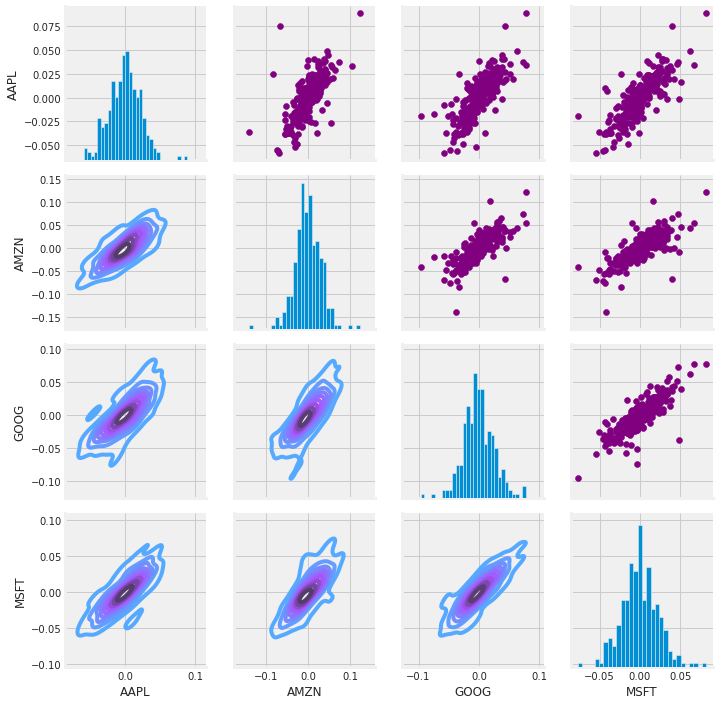

In [14]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

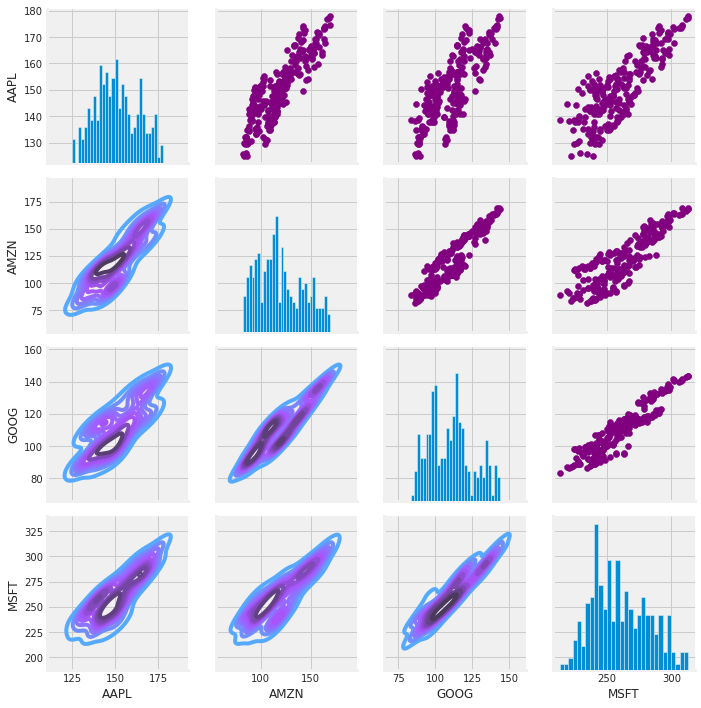

In [15]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Text(0.5, 1.0, 'Correlation of stock closing price')

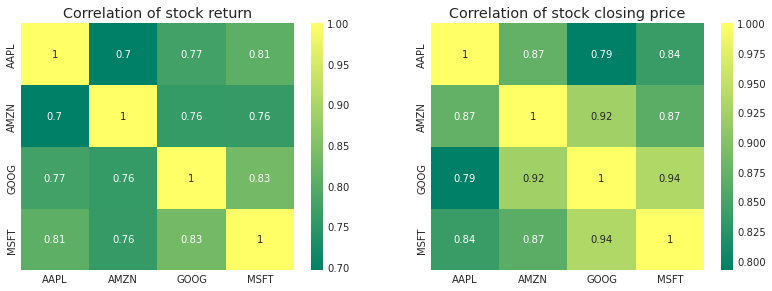

In [16]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

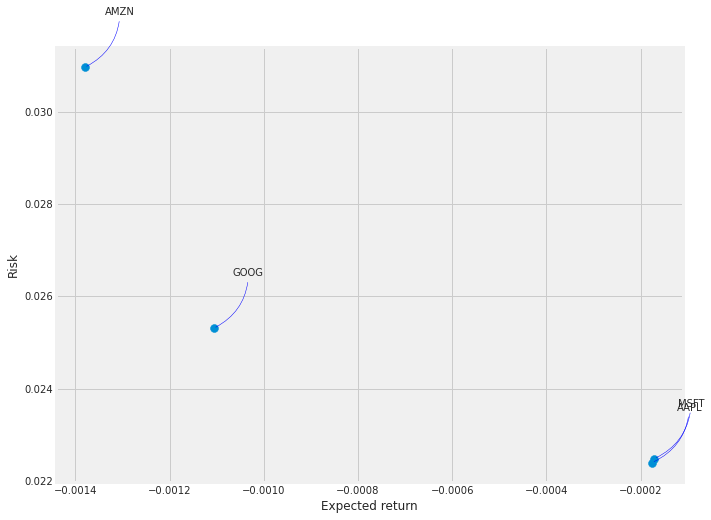

In [17]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [18]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.500192,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.567371,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.706894,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.839725,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.819359,394024400
...,...,...,...,...,...,...
2023-02-06,152.570007,153.100006,150.779999,151.729996,151.498688,69858300
2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100


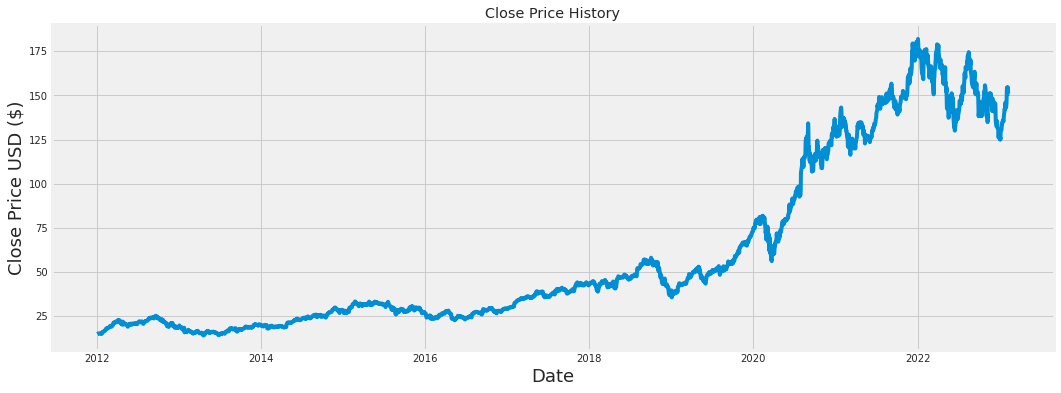

In [19]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [21]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2657

In [22]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.82095948],
       [0.81471179],
       [0.81554481]])

In [24]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.00

In [25]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2023-02-12 00:22:10.215337: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-02-12 00:22:10.919828: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2597/2597 [==============================] - 134s 50ms/step - loss: 0.0021


In [45]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse
predictions

array([[149.9992  ],
       [150.35037 ],
       [151.02866 ],
       [151.83559 ],
       [153.17583 ],
       [154.50897 ],
       [155.53278 ],
       [156.94939 ],
       [158.3417  ],
       [159.51692 ],
       [160.39728 ],
       [161.03322 ],
       [161.93622 ],
       [162.77113 ],
       [163.8716  ],
       [165.08264 ],
       [166.19145 ],
       [167.28688 ],
       [168.19925 ],
       [168.63376 ],
       [168.36435 ],
       [167.74959 ],
       [167.06075 ],
       [166.68048 ],
       [165.80412 ],
       [164.57109 ],
       [163.0414  ],
       [161.36423 ],
       [159.88936 ],
       [158.45255 ],
       [157.0738  ],
       [156.04195 ],
       [155.13892 ],
       [154.72656 ],
       [155.25378 ],
       [155.14645 ],
       [154.92998 ],
       [154.35191 ],
       [153.48322 ],
       [152.97302 ],
       [152.94588 ],
       [152.81822 ],
       [152.5632  ],
       [152.02438 ],
       [151.44447 ],
       [151.01097 ],
       [150.48932 ],
       [149.1

In [44]:
new_test = model.predict([[[0.81]]])
print(new_test)

[[0.22811013]]


In [55]:
x_test
print(len(x_test[2]))

60


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


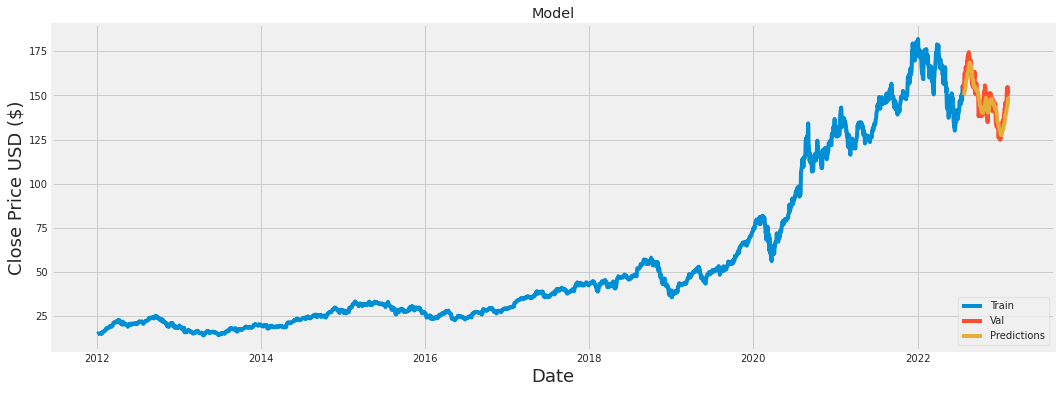

In [27]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [28]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-07-26,151.600006,149.999207
2022-07-27,156.789993,150.350372
2022-07-28,157.350006,151.028656
2022-07-29,162.509995,151.835587
2022-08-01,161.509995,153.175827
...,...,...
2023-02-06,151.729996,144.824097
2023-02-07,154.649994,146.215225
2023-02-08,151.919998,147.657974


In [34]:
model.save("/kaggle/working/model.pkl")

In [82]:
print(x_test[0])

[[0.89069545]
 [0.85505391]
 [0.85689854]
 [0.86594273]
 [0.90485688]
 [0.84981783]
 [0.85285238]
 [0.8217925 ]
 [0.83637039]
 [0.78870958]
 [0.76526591]
 [0.79233919]
 [0.78299738]
 [0.80501307]
 [0.75491267]
 [0.73426559]
 [0.73569357]
 [0.76853852]
 [0.75217556]
 [0.75312761]
 [0.77252512]
 [0.80739311]
 [0.80263295]
 [0.80185949]
 [0.81673491]
 [0.78204542]
 [0.78656752]
 [0.80185949]
 [0.79739687]
 [0.76574193]
 [0.73295654]
 [0.70171816]
 [0.70695425]
 [0.72284118]
 [0.69088881]
 [0.69981407]
 [0.72545927]
 [0.72236525]
 [0.73973973]
 [0.75991079]
 [0.75991079]
 [0.73480108]
 [0.74545184]
 [0.73051695]
 [0.74366677]
 [0.75931574]
 [0.76740797]
 [0.78781709]
 [0.79192263]
 [0.77901078]
 [0.78490148]
 [0.78269995]
 [0.80043142]
 [0.81054669]
 [0.79210122]
 [0.81548534]
 [0.82762364]
 [0.8413686 ]
 [0.83387133]
 [0.82708815]]


In [47]:
from keras.models import load_model
modelNew = load_model('/kaggle/working/model.h5')
predictions = modelNew.predict([[[0.81]]])
print(predictions)


[[0.22811013]]
